# More practice with pandas


### Objective of this notebook
Using the same dataset that we used in Colab_Lec03, let's practice more data exploration.

In [2]:
# Import libraries
import pandas as pd

In [195]:
# Read in the movie data set
movie_filepath = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/top_movies_2020.csv'
movies_df = pd.read_csv(movie_filepath)

Recall, how do you find out information and details of your dataset?

In [196]:
## What is the size of the table?
print(movies_df.shape)
## What are the data type of each of the columns in the table?
print(movies_df.dtypes)
## How many missing values are in each column?
movies_df.isnull().sum()

(200, 4)
Title               object
Gross                int64
Gross (Adjusted)     int64
Year                 int64
dtype: object


Title               0
Gross               0
Gross (Adjusted)    0
Year                0
dtype: int64

## Questions to find the next blockbuster
Let's get some information about trends in movie's gross to decide which movie were popular and high grossing so we can make a pitch for the next blockbuster. Use either tables or plots to answer the following questions.

In [197]:
## Q1: What was the max Gross and Gross adj from any movie?
## df.column.max() will return for you max value in the column you specify
gross = movies_df[["Gross","Gross (Adjusted)"]].max()
grossIncome, adjustedGross = gross.iloc[0],gross.iloc[1]
print(gross)
## Q2: Are they the same movie?
print((movies_df[(movies_df["Gross"] == grossIncome) & (movies_df["Gross (Adjusted)"] == adjustedGross)]).empty)

print(movies_df[movies_df["Gross"] == grossIncome]["Title"])
print(movies_df[movies_df["Gross (Adjusted)"] == adjustedGross]["Title"])
## You can look at the index that has your row of interest by setting == to the max value


Gross                936662225
Gross (Adjusted)    1895421694
dtype: int64
True
10    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object
0    Gone with the Wind
Name: Title, dtype: object


In [198]:
## Q2: What was the top performing movie for each decade?
## Using groupby allows us to group together rows within a column
movies_df["Decade"] = (movies_df["Year"]//10) * 10
movies_df.head()
gross_decade = movies_df.groupby("Decade")["Gross"].max().reset_index()

decades = pd.merge(movies_df,gross_decade, on=["Gross","Decade"])
decades

,Title,Gross,Gross (Adjusted),Year,Decade
0,Gone with the Wind,200852579,1895421694,1939,1930
1,Star Wars: Episode IV - A New Hope,460998507,1668979715,1977,1970
2,The Sound of Music,159287539,1335086324,1965,1960
3,E.T. the Extra-Terrestrial,435110554,1329174791,1982,1980
4,Titanic,659363944,1270101626,1997,1990
5,Star Wars: Episode VII - The Force Awakens,936662225,1013038487,2015,2010
6,Avatar,760507625,911790952,2009,2000
7,Bambi,102247150,596985188,1942,1940
8,Lady and the Tramp,93602326,522236013,1955,1950
9,The Four Horsemen of the Apocalypse,9183673,430255408,1921,1920


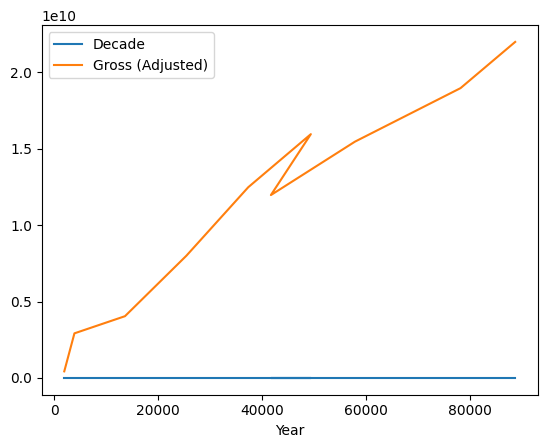

In [200]:
## Q3: To ask if people watch movies more now then in the pass, we are going to ask over the years, is there a difference in the Gross adj over time?
decade_gross_adj = movies_df.groupby("Decade")[["Gross (Adjusted)","Year"]].sum().reset_index()

# decade_gross_adj.head()

decade_gross_adj_by_year = decade_gross_adj.set_index('Year')

lines = decade_gross_adj_by_year.plot.line()
## Q4: In addition, are there more top titles being release now compared to the past years?

What other information do you wish this table included that would have helped us find that next new movie?

# Working with tsv
Pandas is able to work with tab-delimited files as well as comma-delimited files. In the case of tab-delimited, we need to specify the delimiter by using the 'sep' keyword argument.

In [8]:
euk_filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
euk_df = pd.read_csv(euk_filepath, sep='\t')

In [ ]:
## Let's start with getting some information about our table. What is a quick way to do so?


In [ ]:
## I want to narrow down my tables to only include Fungi, how would I go about that?


In [9]:
## Let's further narrow down the table to look at Funggi that has genome size > 100. How many specimens remain?


In [ ]:
## Which species are in our table, that is Fungi with genome size > 100 Mb


Next class we will do some more data exploration